# El método del codo y el factor de la silueta del clustering

In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Empezamos creando unos datos y dibujándolos.

In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

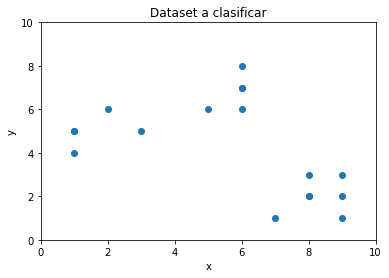

In [4]:
plt.plot()
plt.xlim([min(x1)-1,max(x1)+1])
plt.ylim([min(x1)-1,max(x1)+1])
plt.title('Dataset a clasificar')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x1,x2)
plt.show()

Ahora prepararemos un algoritmo que ejecute todo el proceso. Este lo podemos transformar en función para aplicarlo en otros casos.

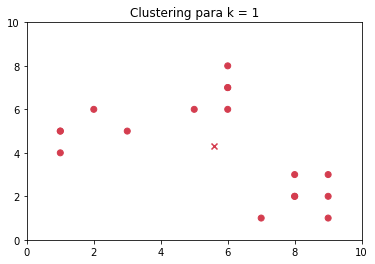

>> Para k = 2 el promedio de la silueta es de: 0.6113424368705715
   - Para i = 1la silueta del cluster vale: 0.7746251901389686
   - Para i = 2la silueta del cluster vale: 0.49704450958269375


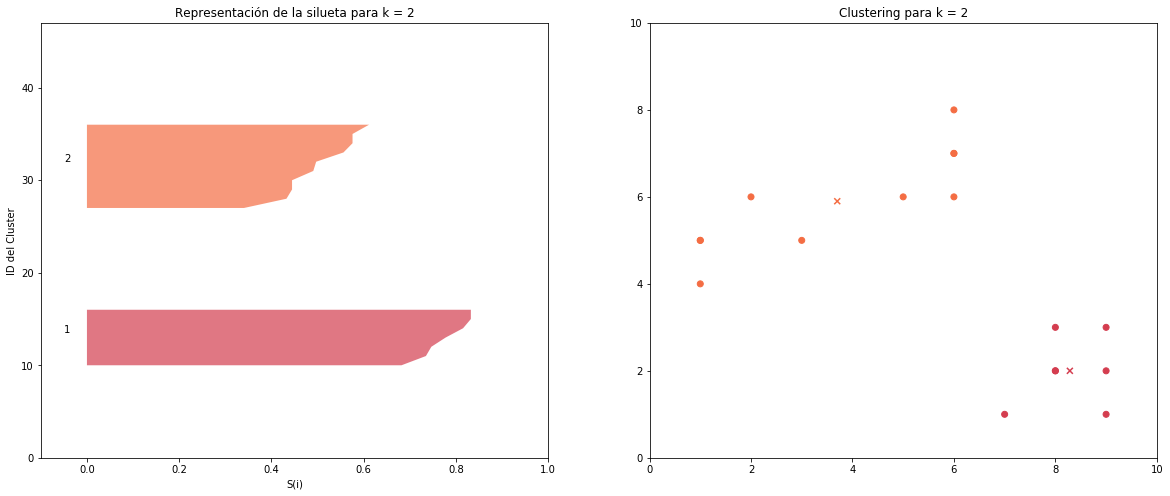

>> Para k = 3 el promedio de la silueta es de: 0.7122079383287169
   - Para i = 1la silueta del cluster vale: 0.6609508863896014
   - Para i = 2la silueta del cluster vale: 0.7322200728725188
   - Para i = 3la silueta del cluster vale: 0.7345257364682265


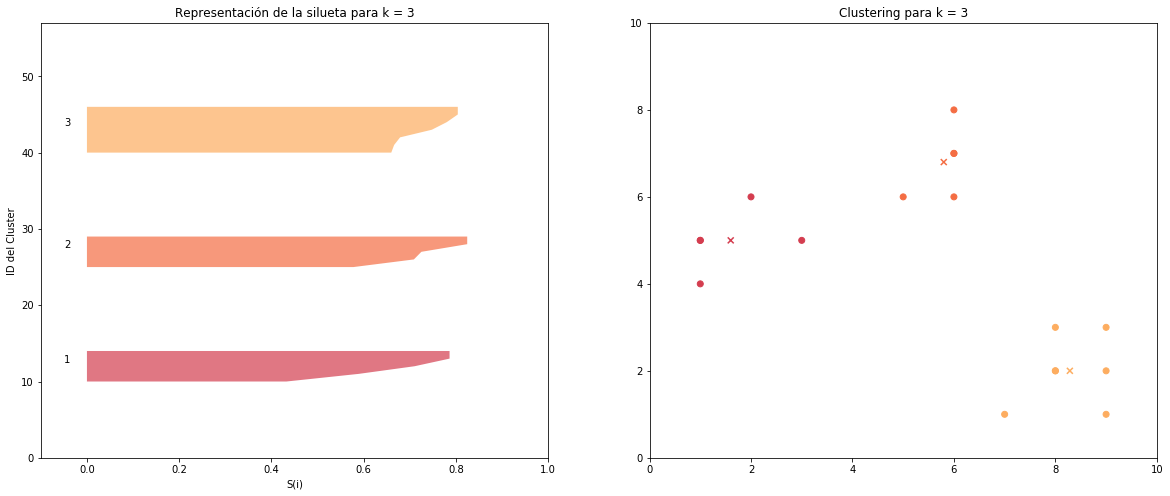

>> Para k = 4 el promedio de la silueta es de: 0.6389948643127632
   - Para i = 1la silueta del cluster vale: 0.654458796162702
   - Para i = 2la silueta del cluster vale: 0.7345257364682265
   - Para i = 3la silueta del cluster vale: 0.655666655624379
   - Para i = 4la silueta del cluster vale: 0.24096929517637128


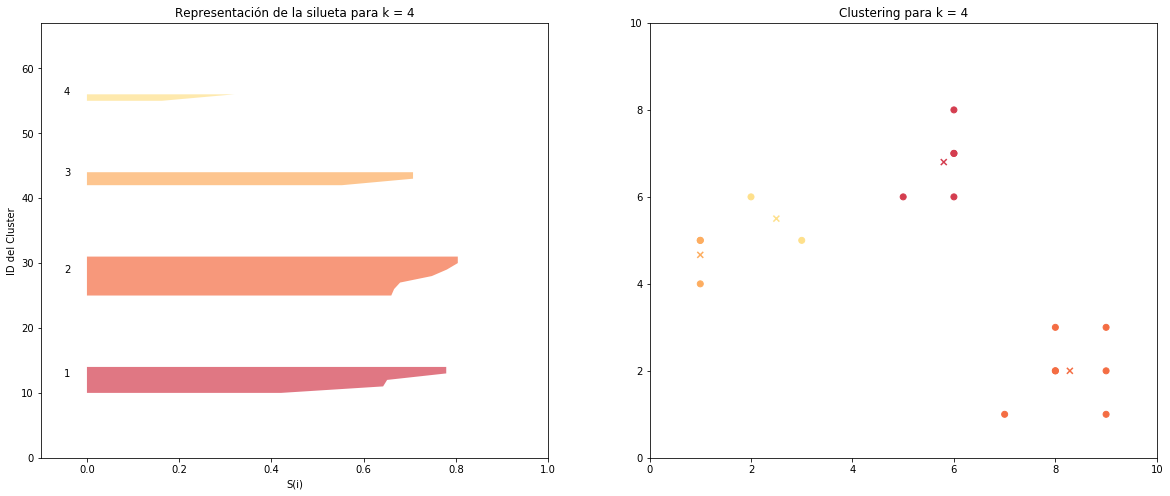

>> Para k = 5 el promedio de la silueta es de: 0.4388590685218098
   - Para i = 1la silueta del cluster vale: 0.19019110726892913
   - Para i = 2la silueta del cluster vale: 0.24096929517637128
   - Para i = 3la silueta del cluster vale: 0.654458796162702
   - Para i = 4la silueta del cluster vale: 0.655666655624379
   - Para i = 5la silueta del cluster vale: 0.39420804524336517


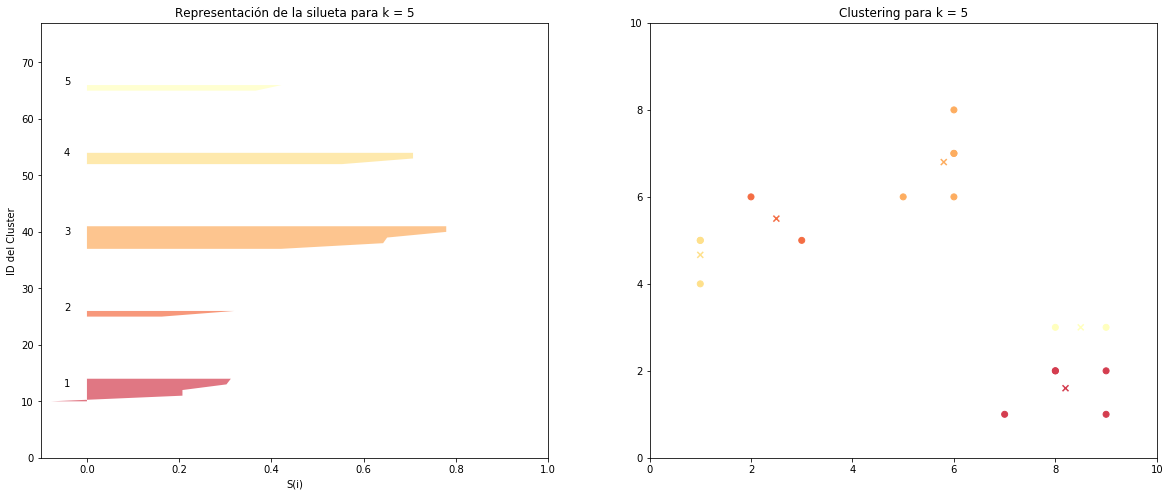

>> Para k = 6 el promedio de la silueta es de: 0.39661977826122785
   - Para i = 1la silueta del cluster vale: 0.655666655624379
   - Para i = 2la silueta del cluster vale: 0.42346712707864664
   - Para i = 3la silueta del cluster vale: 0.32882042637679976
   - Para i = 4la silueta del cluster vale: 0.24096929517637128
   - Para i = 5la silueta del cluster vale: -0.09040786759303471
   - Para i = 6la silueta del cluster vale: 0.5664789734180768


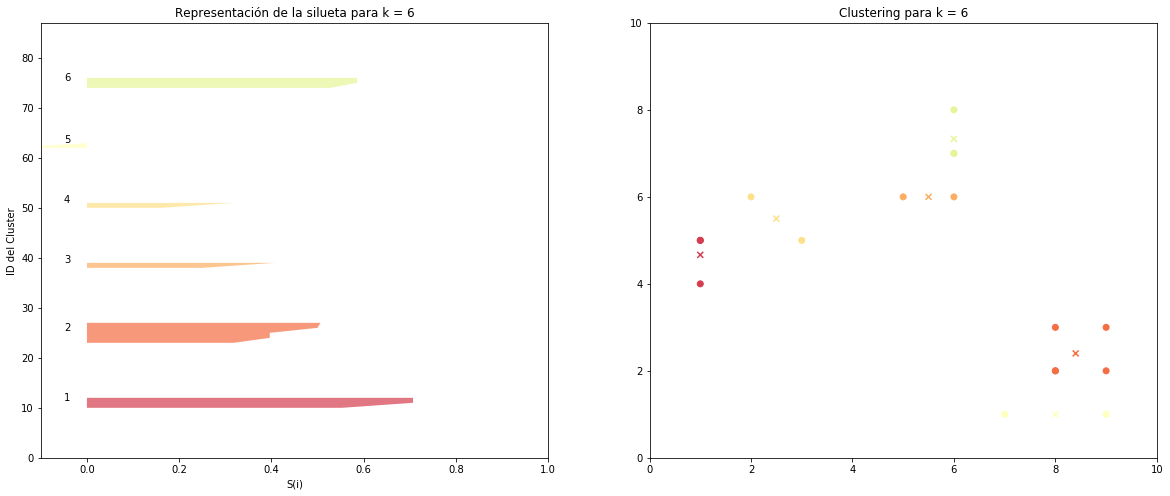

>> Para k = 7 el promedio de la silueta es de: 0.3883319447429514
   - Para i = 1la silueta del cluster vale: 0.5664789734180768
   - Para i = 2la silueta del cluster vale: 0.263812295212263
   - Para i = 3la silueta del cluster vale: 0.655666655624379
   - Para i = 4la silueta del cluster vale: 0.31700053499298475
   - Para i = 5la silueta del cluster vale: 0.32882042637679976
   - Para i = 6la silueta del cluster vale: 0.24096929517637128
   - Para i = 7la silueta del cluster vale: 0.0


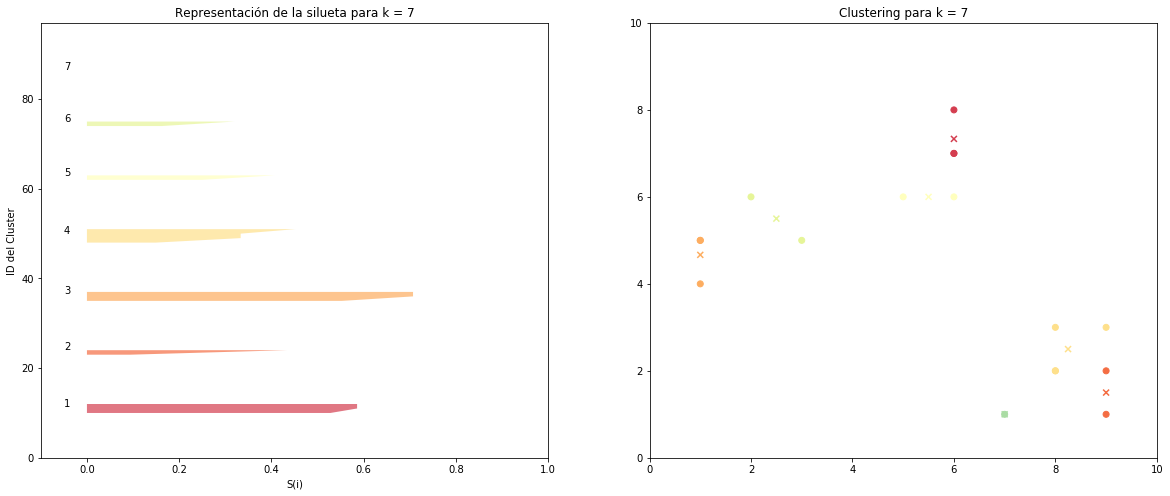

>> Para k = 8 el promedio de la silueta es de: 0.35345323083317454
   - Para i = 1la silueta del cluster vale: 0.30004208861569454
   - Para i = 2la silueta del cluster vale: 0.32882042637679976
   - Para i = 3la silueta del cluster vale: 0.6152265411044983
   - Para i = 4la silueta del cluster vale: 0.5664789734180768
   - Para i = 5la silueta del cluster vale: 0.0
   - Para i = 6la silueta del cluster vale: 0.0
   - Para i = 7la silueta del cluster vale: 0.3028895866899326
   - Para i = 8la silueta del cluster vale: 0.0


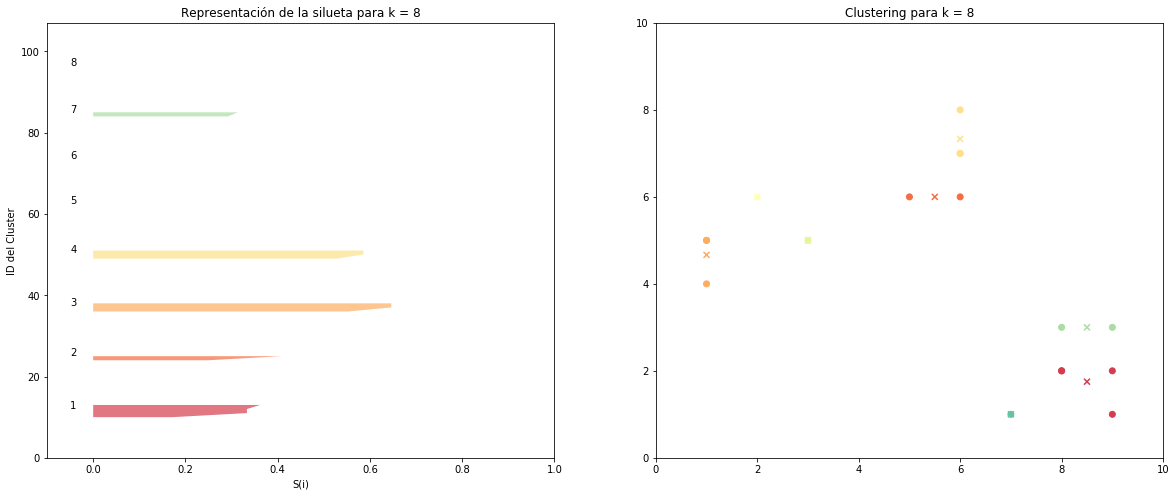

>> Para k = 9 el promedio de la silueta es de: 0.34011594848992555
   - Para i = 1la silueta del cluster vale: 0.0
   - Para i = 2la silueta del cluster vale: 0.39052429175126996
   - Para i = 3la silueta del cluster vale: 0.5664789734180768
   - Para i = 4la silueta del cluster vale: 0.6152265411044983
   - Para i = 5la silueta del cluster vale: 0.0
   - Para i = 6la silueta del cluster vale: 0.20382042637679978
   - Para i = 7la silueta del cluster vale: 0.0
   - Para i = 8la silueta del cluster vale: 0.32882042637679976
   - Para i = 9la silueta del cluster vale: 0.0


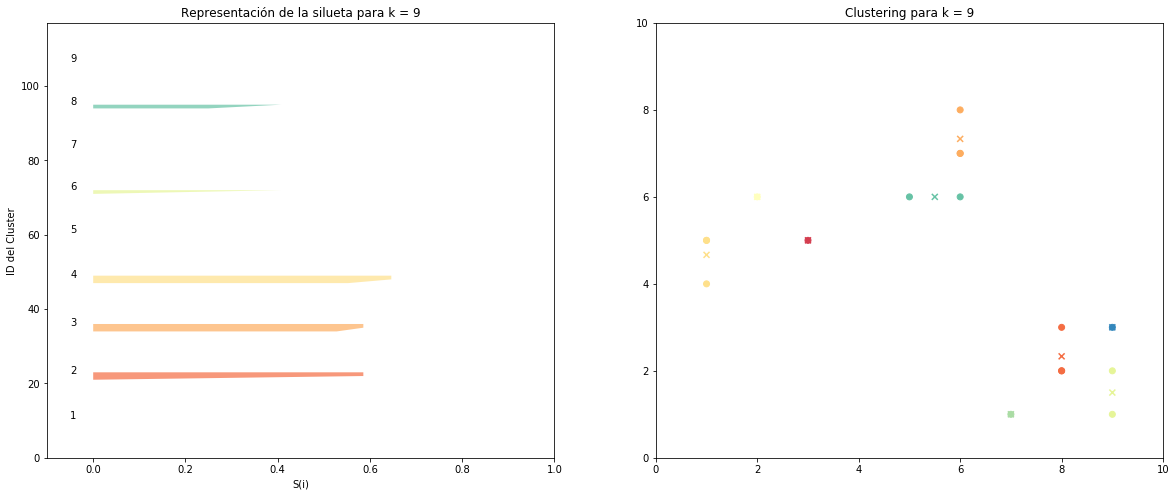

In [13]:
# Definimos el número máximo de clusters
max_k = 10

# Definimos el rango de k.
# Si queremos que aparezca la iteración 10, tendremos que pasar max_k + 1
K = range(1,max_k)

# Definimos la suma de los cuadrados de las diferencias como un array vacío
ssw = []
# Definimos una paleta para la representación

color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
# Definimos el centroide de los datos
centroid = [sum(X)/len(X) for i in K]
# Definimos la suma de los errores cuadrados internos
sst = sum(np.min(cdist(X, centroid, 'euclidean'), axis = 1))

for i, k in enumerate(K):
    kmeanModel = KMeans(n_clusters = k).fit(X)
    
    # Reasignamos los resultados del modelo para facilitar su uso
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    # Calculamos la sumas de distancias de cada punto al varicentro y las sumo todas
    ssw_k = sum(np.mean(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1))
    ssw.append(ssw_k)
    
    # Definimos los colores
    label_color = [color_palette[i] for i in labels]
    
    """
    Fabricamos una silueta para cada cluster.
    
    Hay dos casos en los que no podremos fabricar la silueta
    * Con k = 1
    * Con k = len(X)
    Para estos casos, el método de la silueta no funciona
    """
    if 1<k<len(X):
        # Creamos subplot de una fila y dos columnas, para pintar los diferentes gráficos
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        # El primer subplot contendrá la silueta, y su rango de valores será de -1 a 1
        # En este caso, ya conocemos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        # El número de clusters a insertar determinará el tamaño de cada barra
        # El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos
        # entre siluetas individuales de cada cluster para separarlas
        axis1.set_ylim([0, len(X)+(k+1)*10]) # se puede jugar con el 10 según convenga
        
        silhouette_avg = silhouette_score(X, labels)
        print(">> Para k = " + str(k) + " el promedio de la silueta es de: " + str(silhouette_avg))
        sample_silhouette_values = silhouette_samples(X, labels) 
        
        # La y empezará en 10
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = " + str(i+1) + 
                  "la silueta del cluster vale: " + str(np.mean(ith_cluster_sv)))
            # Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            # Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            # La y irá subiendo paulatinamente hacia arriba en función del tamaño del cluster
            # Esto es así para que el gráfico quede escalado correctamente en el eje vertical
            y_upper = y_lower + ith_cluster_size
            
            # Elegimos el color
            color = color_palette[i]
            
            # Representamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                              ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            # Etiquetamos el cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            # Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 # dejamos vacías las mismas posiciones que antes
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ### Fin de la representación de la silueta
        
    """
    Dibujamos los k-means con los puntos respectivos
    """
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette[0:i+1], marker = "x")
    plt.show()

 ## Representación del codo

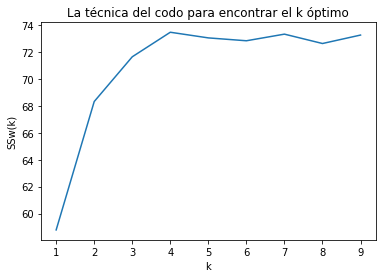

In [15]:
plt.plot(K, ssw)
plt.xlabel('k')
plt.ylabel('SSw(k)')
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

## Representación del codo normalizado

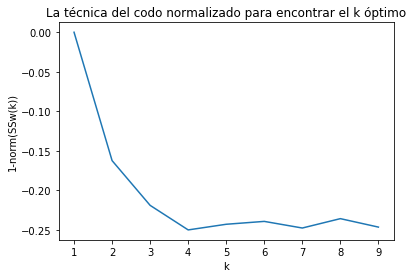

In [16]:
plt.plot(K, 1-ssw/sst)
plt.xlabel('k')
plt.ylabel('1-norm(SSw(k))')
plt.title("La técnica del codo normalizado para encontrar el k óptimo")
plt.show()